# 多层感知机

In [311]:
import torch
import torch.autograd
import matplotlib.pyplot as plt
import numpy as np
import dataset.fashion_mnist.utils.mnist_reader as mnist_reader
import tqdm

In [312]:
x_train, y_train = mnist_reader.load_mnist('dataset/fashion_mnist/data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('dataset/fashion_mnist/data/fashion', kind='t10k')

In [313]:
x_train = x_train.astype("float")
x_test = x_test.astype("float")
y_train = y_train.astype("float")
y_test = y_test.astype("float")

In [314]:
def get_fashion_mnist_labels(true_labels, yhat_labels = []):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    if(len(yhat_labels) > 0):
        labels = []
        for i in range(true_labels.size()[0]):
            labels.append("true: " + text_labels[true_labels[i].int()] + " predict: " + text_labels[yhat_labels[i]])
    else:
        labels = [text_labels[int(i)] for i in true_labels]
    return labels

In [315]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=2):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img.reshape(28, 28))
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'shirt'}>,
       <Axes: title={'center': 'coat'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 'coat'}>, <Axes: title={'center': 'bag'}>,
       

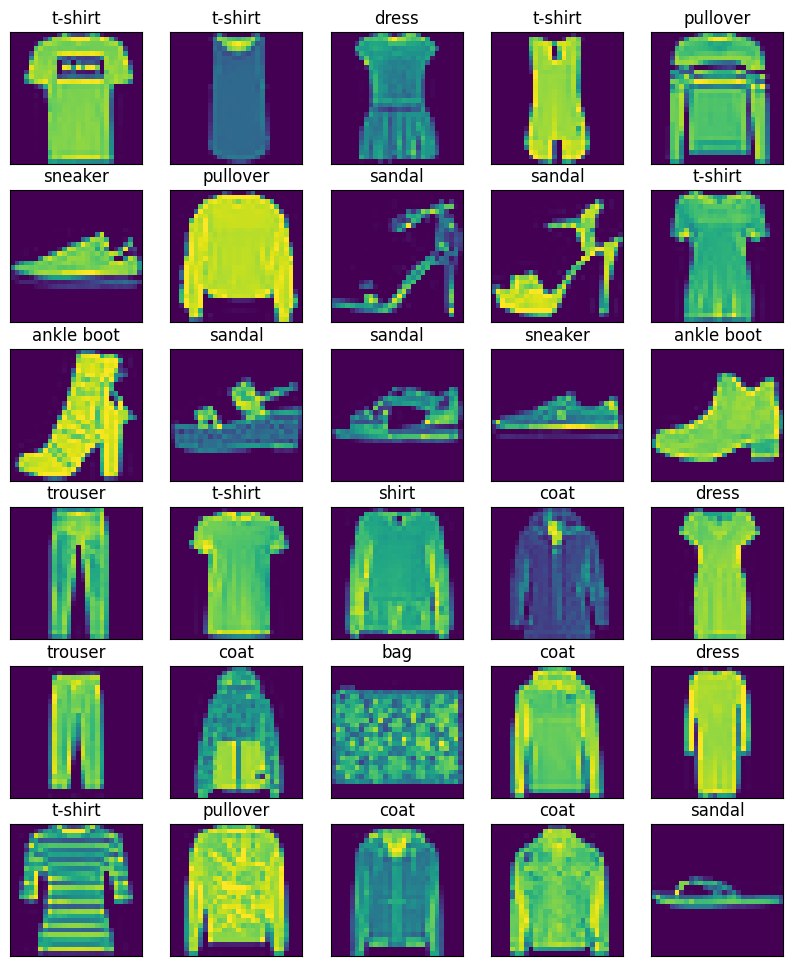

In [316]:
show_images(x_train[1:31], 6, 5, titles=get_fashion_mnist_labels(y_train[1:31]))

In [317]:
num_inputs = 28 * 28
num_outputs = 10
num_hiden = 256
w1 = np.random.uniform(0, 0.001, size = (num_hiden, num_inputs))
b1 = np.random.uniform(0, 0.001, size = (num_hiden))
w2 = np.random.uniform(0, 0.001, size = (num_outputs, num_hiden))
b2 = np.random.uniform(0, 0.001, size = (num_outputs))

In [318]:
x_train = torch.tensor(x_train, requires_grad=True)
y_train = torch.tensor(y_train, requires_grad=True)
x_test = torch.tensor(x_test, requires_grad=True)
y_test = torch.tensor(y_test, requires_grad=True)
w1 = torch.tensor(w1, requires_grad=True)
b1 = torch.tensor(b1, requires_grad=True)
w2 = torch.tensor(w2, requires_grad=True)
b2 = torch.tensor(b2, requires_grad=True)

In [319]:
def hiden(x, w, b):
    return torch.relu(torch.mm(w, x.T) + b.view(-1, 1))

In [320]:
def output(x, w, b):
    return torch.mm(w, x) + b.view(-1, 1)

In [321]:
def softmax(x):
    x_exp = torch.exp(x)
    partition = x_exp.sum(dim=0, keepdim=True)
    return x_exp / partition

In [322]:
def net(x, w1, b1, w2, b2):
    return softmax(output(hiden(x, w1, b1), w2, b2))

In [323]:
def J(yhat, ytrue):
    return - ytrue * torch.log(yhat)

In [324]:
yhat = net(x_train, w1, b1, w2, b2)

In [325]:
print(yhat)

tensor([[0.0937, 0.0923, 0.0980,  ..., 0.0951, 0.0976, 0.0988],
        [0.1095, 0.1104, 0.1037,  ..., 0.1079, 0.1045, 0.1021],
        [0.1056, 0.1056, 0.1024,  ..., 0.1043, 0.1028, 0.1016],
        ...,
        [0.0761, 0.0743, 0.0909,  ..., 0.0804, 0.0894, 0.0947],
        [0.0815, 0.0799, 0.0930,  ..., 0.0848, 0.0918, 0.0960],
        [0.0842, 0.0823, 0.0942,  ..., 0.0873, 0.0932, 0.0964]],
       dtype=torch.float64, grad_fn=<DivBackward0>)


In [326]:
y_train = torch.nn.functional.one_hot(y_train.to(torch.int64)) 

In [327]:
print(y_train.shape)
print(yhat.shape)
print(y_train)

torch.Size([60000, 10])
torch.Size([10, 60000])
tensor([[0, 0, 0,  ..., 0, 0, 1],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])


In [328]:
lr = 5
n = x_train.size()[0]
for i in tqdm.tqdm(range(0, 200)):
    yhat = net(x_train, w1, b1, w2, b2)
    loss = J(yhat.T, y_train).sum() / n
    loss.backward()
    w1.data = w1.data - lr * w1.grad.data / n
    b1.data = b1.data - lr * b1.grad.data / n
    w2.data = w2.data - lr * w2.grad.data / n
    b2.data = b2.data - lr * b2.grad.data / n

100%|██████████| 200/200 [03:22<00:00,  1.01s/it]


In [329]:
print(w1)
print(b1)
print(w2)
print(b2)

tensor([[ 9.4923e-04,  2.3320e-04,  4.3905e-04,  ..., -8.1646e-04,
          2.2997e-04,  2.6323e-04],
        [ 2.4735e-04,  4.7506e-04,  5.0945e-04,  ...,  5.4009e-04,
          5.9785e-04,  1.2882e-04],
        [ 7.1170e-04,  2.7538e-04,  4.9770e-04,  ...,  3.6008e-05,
         -1.6938e-04, -1.3806e-05],
        ...,
        [ 7.5466e-04,  4.1097e-04,  4.9683e-04,  ..., -3.8866e-04,
          2.9012e-04,  7.6528e-04],
        [ 1.1363e-04,  6.3645e-04,  6.1136e-04,  ...,  3.9126e-05,
          5.3489e-04,  6.2532e-04],
        [ 4.7556e-04,  5.8543e-04,  3.5599e-04,  ..., -6.4342e-04,
          1.6683e-04,  7.8081e-05]], dtype=torch.float64, requires_grad=True)
tensor([ 7.7767e-04, -4.2044e-05,  6.4030e-04,  4.0091e-04,  7.3391e-04,
         8.3070e-04,  2.4969e-05,  4.6343e-04,  8.7541e-04,  3.5354e-04,
         6.9578e-04, -4.3587e-05,  4.7410e-04,  6.7982e-04,  5.8499e-04,
         5.3479e-04,  5.0796e-04,  5.4350e-04,  2.7932e-04,  2.2002e-04,
         8.9005e-04,  8.3176e-04,  

In [330]:
yhat = net(x_test, w1, b1, w2, b2)
print(yhat.max(dim=0))

torch.return_types.max(
values=tensor([0.9681, 0.9160, 1.0000,  ..., 0.8805, 1.0000, 0.9540],
       dtype=torch.float64, grad_fn=<MaxBackward0>),
indices=tensor([9, 2, 1,  ..., 8, 1, 5]))


In [331]:
yhat = yhat.argmax(dim=0)

In [332]:
right_num = 0
n = y_test.size()[0]

for i in tqdm.tqdm(range(0, n)):
    if y_test[i] == yhat[i]:
        right_num = right_num + 1
print("准确率：%f %%" % ((right_num / n) * 100))

100%|██████████| 10000/10000 [00:00<00:00, 79831.29it/s]

准确率：81.840000 %


array([<Axes: title={'center': 'true: pullover predict: pullover'}>,
       <Axes: title={'center': 'true: trouser predict: trouser'}>,
       <Axes: title={'center': 'true: trouser predict: trouser'}>,
       <Axes: title={'center': 'true: shirt predict: shirt'}>,
       <Axes: title={'center': 'true: trouser predict: trouser'}>,
       <Axes: title={'center': 'true: coat predict: coat'}>,
       <Axes: title={'center': 'true: shirt predict: shirt'}>,
       <Axes: title={'center': 'true: sandal predict: sandal'}>,
       <Axes: title={'center': 'true: sneaker predict: sneaker'}>,
       <Axes: title={'center': 'true: coat predict: pullover'}>,
       <Axes: title={'center': 'true: sandal predict: sandal'}>,
       <Axes: title={'center': 'true: sneaker predict: sandal'}>,
       <Axes: title={'center': 'true: dress predict: dress'}>,
       <Axes: title={'center': 'true: coat predict: coat'}>,
       <Axes: title={'center': 'true: trouser predict: trouser'}>,
       <Axes: title={'ce

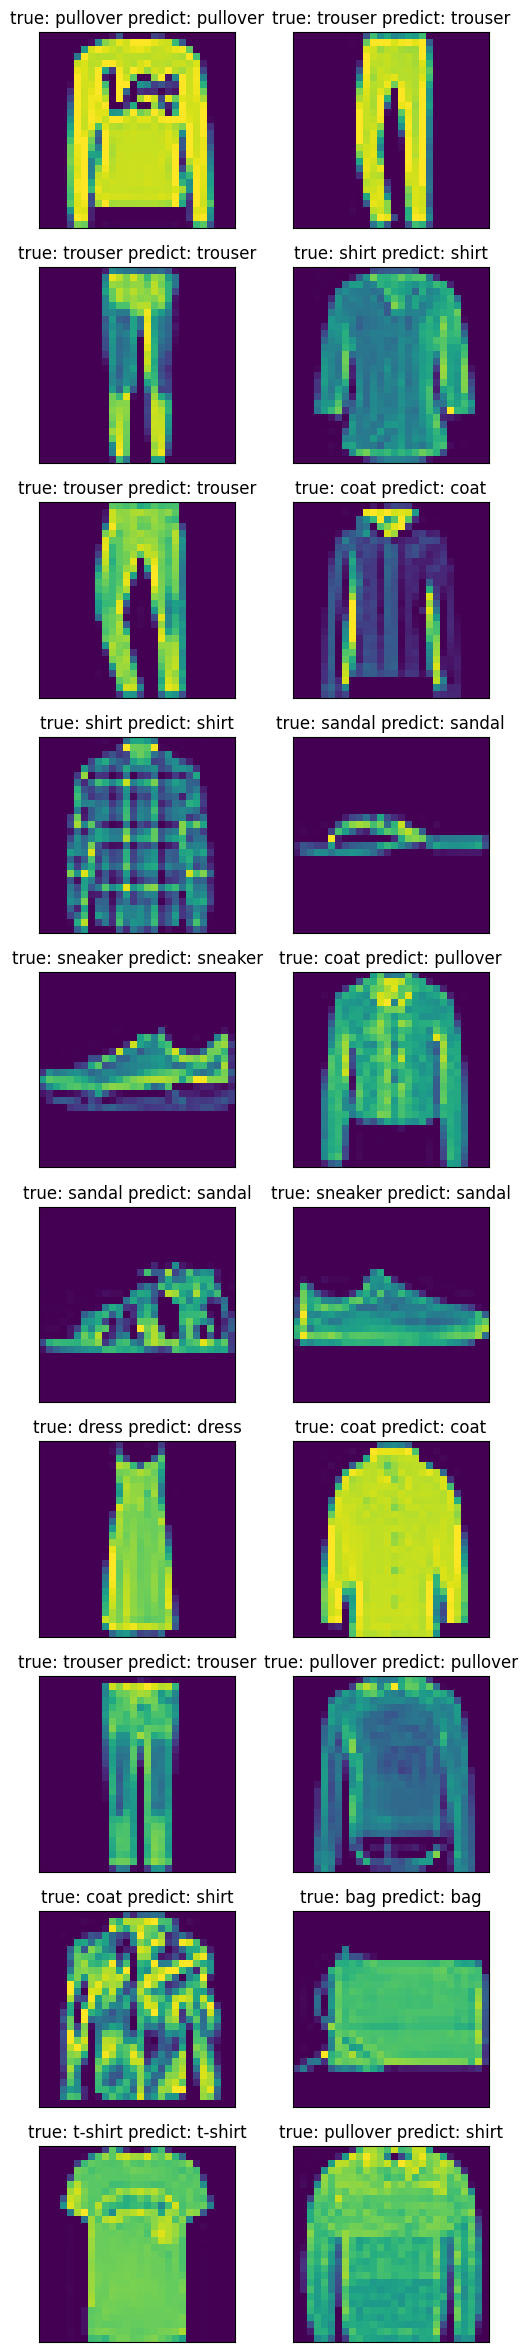

In [333]:
x_test = x_test.detach().numpy()
show_images(x_test[1:31], 10, 2, titles=get_fashion_mnist_labels(y_test[1:31], yhat[1:31]), scale=3)